# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations

* The temperatures of the cities closest the equator or 0 latitude is warmest and gets cooler the futher the cities get from the equator.

* The Northern Hemisphere - Temperature v Latitude plot shows a r-squared value of -0.867 which is a strong positive relationship. Temperatures are coolest when the cities are closer the north pole, but the hottest when the cities are closer to the equator, and vise versa.

* There is not strong relation between Humidity, Cloudiness, and Wind Speed in the Norther and Southern Hemisphere against the respective latitude the cities are located. The latitude position of the cities has no effects on those variables.

In [93]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [95]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [96]:
print(f'''Beginning Data Retrieval
-----------------------------------
      ''')

url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Create empty lists to streo the data for each feild
city_id_list = []
city_name_list = []
country_list = []
date_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

for index, city in enumerate(cities, start = 1):
    

    
    try:
        
        response_json = requests.get(query_url + city).json()
        
        city_id = response_json['id']
        city_id_list.append(city_id)
        
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)
        
        date = response_json['dt']
        date_list.append(date)
        
        lng = response_json['coord']['lon']
        lng_list.append(lng)
        
        lat = response_json['coord']['lat']
        lat_list.append(lat)
        
        temp = response_json['main']['temp']
        temp_list.append(temp)
        
        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)
        
        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)
        
        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        
        print("City not found. Skipping...")

        
        
print(f'''
-----------------------------------
Data Retrieval Complete
-----------------------------------
      ''')

Beginning Data Retrieval
      -----------------------------------
      
Processing Record 1 of Set 1 : butaritari
Processing Record 2 of Set 1 : ahipara
Processing Record 3 of Set 1 : rikitea
City not found. Skipping...
Processing Record 4 of Set 1 : yellowknife
Processing Record 5 of Set 1 : sesimbra
Processing Record 6 of Set 1 : bluff
Processing Record 7 of Set 1 : busdi
Processing Record 8 of Set 1 : verkhnevilyuysk
Processing Record 9 of Set 1 : bredasdorp
Processing Record 10 of Set 1 : carnarvon
Processing Record 11 of Set 1 : ushuaia
City not found. Skipping...
Processing Record 12 of Set 1 : hilo
Processing Record 13 of Set 1 : punta arenas
City not found. Skipping...
Processing Record 14 of Set 1 : east london
Processing Record 15 of Set 1 : albany
Processing Record 16 of Set 1 : nikolskoye
Processing Record 17 of Set 1 : yenagoa
Processing Record 18 of Set 1 : norman wells
Processing Record 19 of Set 1 : beloha
Processing Record 20 of Set 1 : jiuquan
Processing Record 21 o

Processing Record 33 of Set 4 : mahebourg
Processing Record 34 of Set 4 : benguela
Processing Record 35 of Set 4 : manta
Processing Record 36 of Set 4 : laguna
Processing Record 37 of Set 4 : naica
Processing Record 38 of Set 4 : dauriya
Processing Record 39 of Set 4 : ribeira grande
Processing Record 40 of Set 4 : poum
Processing Record 41 of Set 4 : carangola
City not found. Skipping...
Processing Record 42 of Set 4 : margate
Processing Record 43 of Set 4 : upernavik
Processing Record 44 of Set 4 : katsuura
Processing Record 45 of Set 4 : bandarbeyla
Processing Record 46 of Set 4 : san antonio
City not found. Skipping...
Processing Record 47 of Set 4 : chapais
Processing Record 48 of Set 4 : praia da vitoria
Processing Record 49 of Set 4 : khandyga
Processing Record 50 of Set 4 : grindavik
Processing Record 0 of Set 5 : makakilo city
Processing Record 1 of Set 5 : valparaiso
Processing Record 2 of Set 5 : port macquarie
Processing Record 3 of Set 5 : offenburg
Processing Record 4 of 

Processing Record 20 of Set 8 : asau
Processing Record 21 of Set 8 : middelburg
Processing Record 22 of Set 8 : byron bay
Processing Record 23 of Set 8 : lagoa
Processing Record 24 of Set 8 : kavieng
Processing Record 25 of Set 8 : kedougou
Processing Record 26 of Set 8 : cap malheureux
Processing Record 27 of Set 8 : okhotsk
Processing Record 28 of Set 8 : itarema
Processing Record 29 of Set 8 : lakatoro
Processing Record 30 of Set 8 : gorshechnoye
Processing Record 31 of Set 8 : sakakah
Processing Record 32 of Set 8 : trapani
City not found. Skipping...
Processing Record 33 of Set 8 : nantucket
Processing Record 34 of Set 8 : hualmay
Processing Record 35 of Set 8 : athabasca
Processing Record 36 of Set 8 : sawakin
Processing Record 37 of Set 8 : sorland
Processing Record 38 of Set 8 : hoa binh
Processing Record 39 of Set 8 : launceston
Processing Record 40 of Set 8 : bathsheba
Processing Record 41 of Set 8 : brae
Processing Record 42 of Set 8 : lamu
Processing Record 43 of Set 8 : ro

Processing Record 7 of Set 12 : bilibino
Processing Record 8 of Set 12 : la ligua
Processing Record 9 of Set 12 : romny
Processing Record 10 of Set 12 : port victoria
Processing Record 11 of Set 12 : washougal
Processing Record 12 of Set 12 : thinadhoo
Processing Record 13 of Set 12 : leopold
Processing Record 14 of Set 12 : half moon bay
Processing Record 15 of Set 12 : littlehampton
Processing Record 16 of Set 12 : husavik
Processing Record 17 of Set 12 : balabac
Processing Record 18 of Set 12 : timmins
Processing Record 19 of Set 12 : aljezur

-----------------------------------
Data Retrieval Complete
-----------------------------------
      


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [97]:
df_raw_data = pd.DataFrame({
    "City" : city_name_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : temp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : clouds_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list
})

In [98]:
df_raw_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,82.83,79,40,15.23,KI,1621130074
1,Ahipara,-35.1667,173.1667,67.15,68,2,10.65,NZ,1621130091
2,Rikitea,-23.1203,-134.9692,74.55,67,100,17.92,PF,1621130203
3,Yellowknife,62.4560,-114.3525,39.07,65,75,12.66,CA,1621130203
4,Sesimbra,38.4445,-9.1015,63.72,77,75,6.91,PT,1621130204


In [108]:
df_raw_data.to_csv("../output_data/cities.csv", index=False)

In [109]:
round(df_raw_data.describe(),4)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.0000,580.0000,580.0000,580.0000,580.0000,580.0000,5.800000e+02
mean,19.6065,20.6329,63.9233,68.0655,48.9172,7.9726,1.621130e+09
std,33.1328,92.5238,16.1793,21.6970,39.2985,5.4186,1.076614e+02
min,-54.8000,-179.1667,10.8700,5.0000,0.0000,0.3400,1.621130e+09
25%,-8.1135,-60.9574,53.7350,53.0000,6.0000,3.7750,1.621130e+09
50%,23.0750,25.7702,64.4650,73.0000,43.5000,6.6000,1.621130e+09
75%,47.3452,102.4337,76.9475,85.0000,90.0000,11.4850,1.621130e+09
max,78.2186,179.3167,94.7300,100.0000,100.0000,32.0100,1.621130e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

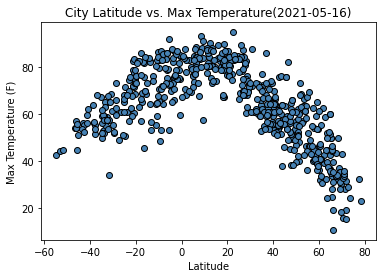

In [123]:
from datetime import datetime
timestamp = df_raw_data["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)



fig, ax = plt.subplots()
ax.scatter(df_raw_data.iloc[:,1],df_raw_data.iloc[:,3], facecolor='steelblue',edgecolor='black')
ax.set(xlabel="Latitude",
       ylabel="Max Temperature (F)",
       title=(f"City Latitude vs. Max Temperature({shortened_timestamp})"));

fig.savefig('../Images/City Latitude vs. Max Temperature(2021-05-16).png')

##### The code is analyzing the highest temperature recording in each city has recorded from this sample, based on the cities Latutude location. 
##### Essentially, the closer a city is to the equator or Latitude 0, the warmer its recorded temperature, and vise versa. 

## Latitude vs. Humidity Plot

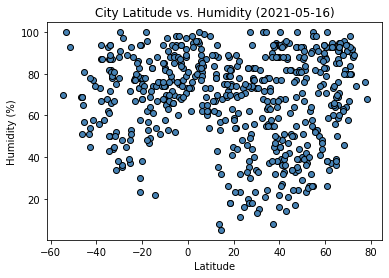

In [124]:
fig, ax = plt.subplots()
ax.scatter(df_raw_data.iloc[:,1],df_raw_data.iloc[:,4], facecolor='steelblue',edgecolor='black')
ax.set(xlabel="Latitude",
       ylabel="Humidity (%)",
       title=(f"City Latitude vs. Humidity ({shortened_timestamp})"));
fig.savefig('../Images/City Latitude vs. Humidity(2021-05-16).png')

##### The code is analyzing the Humidity percentage recorded within the cities in the sample and their relation to latitude. A relation between the city's latitude and humidity percentage is not apparent. 

## Latitude vs. Cloudiness Plot

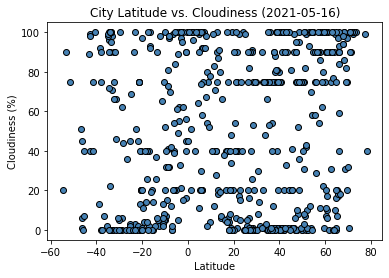

In [125]:
fig, ax = plt.subplots()
ax.scatter(df_raw_data.iloc[:,1],df_raw_data.iloc[:,5],  facecolor='steelblue',edgecolor='black')
ax.set(xlabel="Latitude",
       ylabel="Cloudiness (%)",
       title=(f"City Latitude vs. Cloudiness ({shortened_timestamp})"));
fig.savefig('../Images/City Latitude vs. Cloudiness(2021-05-16).png')

##### The code is analyzing the cities locations based on their latitude against the cloudiness percentage reported. There seems to be no apparent relations between the cities locations based on their latitude and cloudiness percentage.

## Latitude vs. Wind Speed Plot

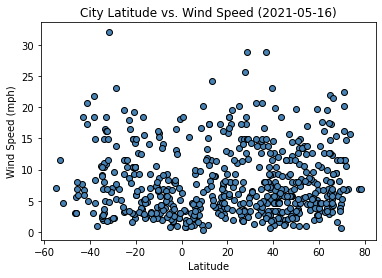

In [126]:
fig, ax = plt.subplots()
ax.scatter(df_raw_data.iloc[:,1],df_raw_data.iloc[:,6], facecolor='steelblue',edgecolor='black')
ax.set(xlabel="Latitude",
       ylabel="Wind Speed (mph)",
       title=(f"City Latitude vs. Wind Speed ({shortened_timestamp})"));
fig.savefig('../Images/City Latitude vs. Wind Speed(2021-05-16).png')

##### The code is analyzing the cities locations base on their latitude against wind speed reported. There seems to be no apparent relations between the two variables.  

## Linear Regression

In [27]:
northern_hemishphere = df_raw_data.loc[df_raw_data["Lat"] >= 0]
southern_hemishphere = df_raw_data.loc[df_raw_data["Lat"] < 0]

In [84]:
def weather_graphing(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
    #linear regression
    print(f"The r-squared is : {round(st.pearsonr(x_axis, y_axis)[0],3)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #graphing
    plt.figure(figsize=(13,8))
    plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue", edgecolors="black")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.annotate(line_eq, text_coordinates,fontsize=15,color="red")
    plt.plot(x_axis,regress_values,"r-")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.867


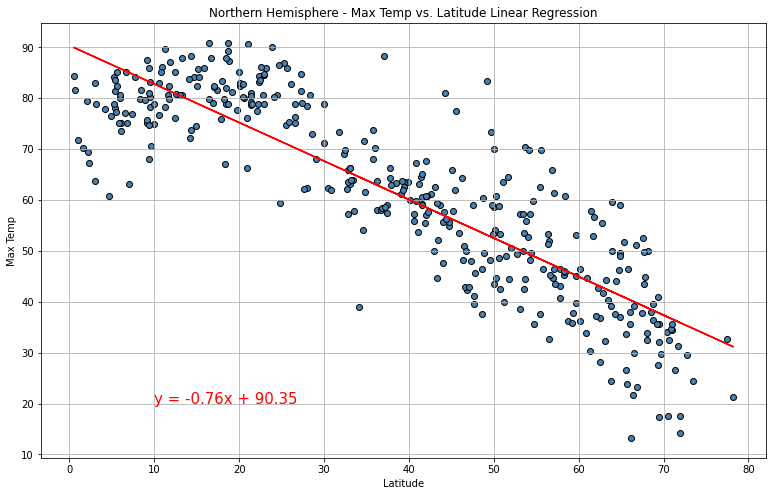

In [128]:
x_axis = northern_hemishphere["Lat"]
y_axis = northern_hemishphere["Max Temp"]
weather_graphing(x_axis, y_axis, 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression', 'Latitude', 'Max Temp', (10,20))
plt.savefig('../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

##### The linear regressions is graphing the relationship between the maximum temperature of cities and their latitude in the northern hemisphere, or north of the equator. The relationship between Max Temperature and Latitude is negative and strong, meaning the further the city is away from 0 latitude or the equator the cooler its temperature in the northern hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.746


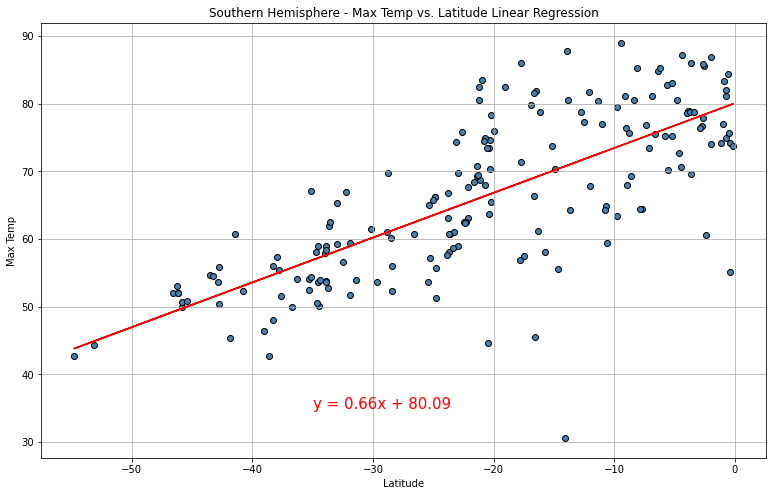

In [129]:
x_axis = southern_hemishphere["Lat"]
y_axis = southern_hemishphere["Max Temp"]
weather_graphing(x_axis, y_axis, 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression', 'Latitude', 'Max Temp', (-35,35))
plt.savefig('../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

##### The linear regressions is graphing the relationship between the maximum temperature of cities and their latitude in the southern hemisphere, or south of the equator. The relationship between Max Temperature and Latitude is positive and strong, meaning the closer the city gets to 0 latitude or the equator the warmer its temperature in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.059


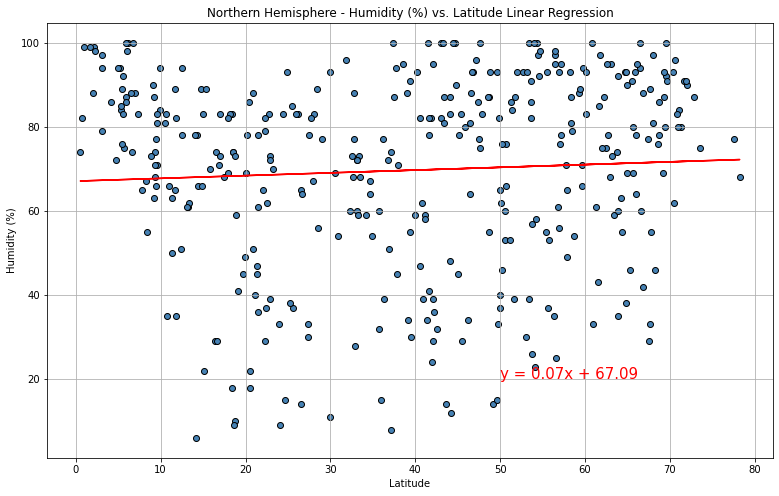

In [130]:
x_axis = northern_hemishphere["Lat"]
y_axis = northern_hemishphere["Humidity"]
weather_graphing(x_axis, y_axis, 'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression', 'Latitude', 'Humidity (%)', (50,20))
plt.savefig('../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

##### The linear regression is graphing the relationship between the humidity percentage of cities and their latitude in the northern hemisphere. The relationship between Humidity and Latitude is positive, but weak, meaning there is no significance change to a cities humidity percentage and its location north of the equator.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.18


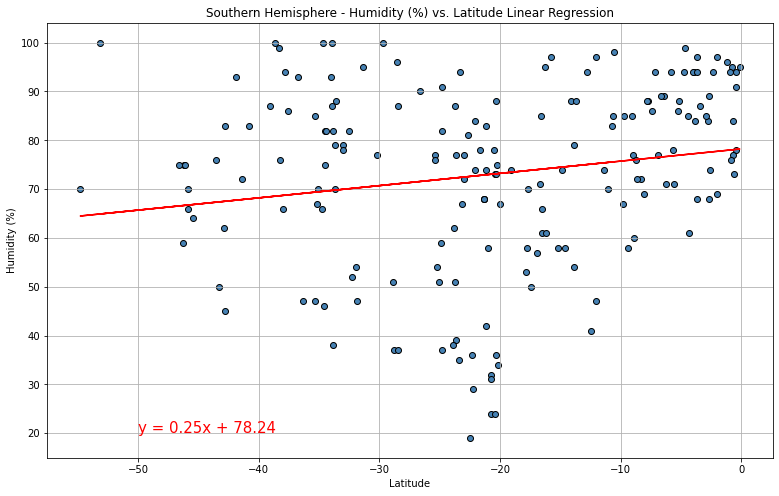

In [131]:
x_axis = southern_hemishphere["Lat"]
y_axis = southern_hemishphere["Humidity"]
weather_graphing(x_axis, y_axis, 'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression', 'Latitude', 'Humidity (%)', (-50,20))
plt.savefig('../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

##### The linear regression is graphing the relationship between the humidity percentage of cities and their latitude in the southern hemisphere. The relationship between Humidity and Latitude is positive, but weak, meaning there is no significance change to a cities humidity percentage and its location south of the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.134


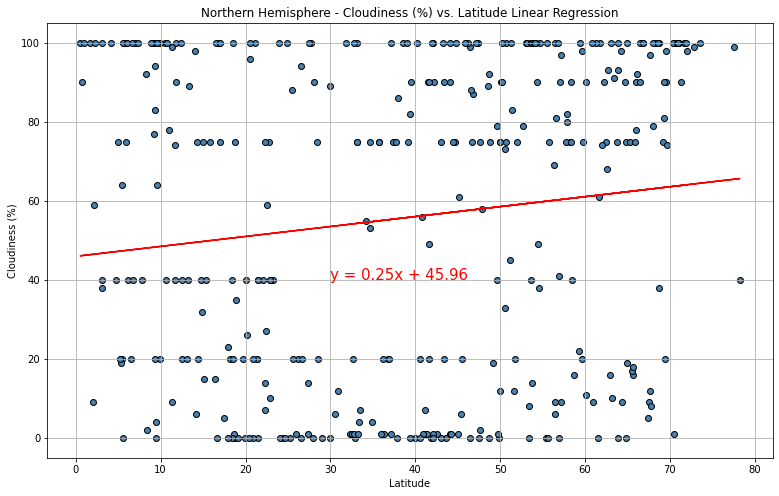

In [132]:
x_axis = northern_hemishphere["Lat"]
y_axis = northern_hemishphere["Cloudiness"]
weather_graphing(x_axis, y_axis, 'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression', 'Latitude', 'Cloudiness (%)', (30,40))
plt.savefig('../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

##### The linear regression is graphing the relationship between the cloudiness percentage of cities and their latitude in the northern hemisphere. The relationship between Cloudiness and Latitude is positive, but weak, meaning there is no significance change to a cities cloudiness percentage and its location north of the equator.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.097


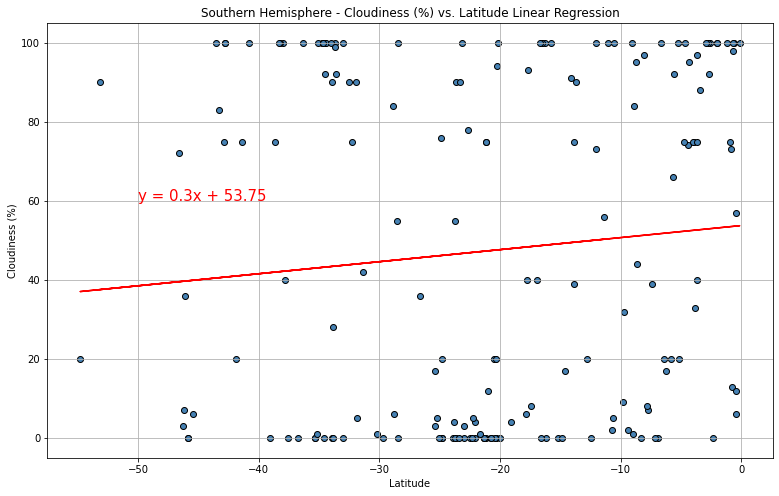

In [133]:
x_axis = southern_hemishphere["Lat"]
y_axis = southern_hemishphere["Cloudiness"]
weather_graphing(x_axis, y_axis, 'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression', 'Latitude', 'Cloudiness (%)', (-50,60))
plt.savefig('../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

##### The linear regression is graphing the relationship between the cloudiness percentage of cities and their latitude in the southern hemisphere. The relationship between Cloudiness and Latitude is positive, but weak, meaning there is no significance change to a cities cloudiness percentage and its location south of the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.016


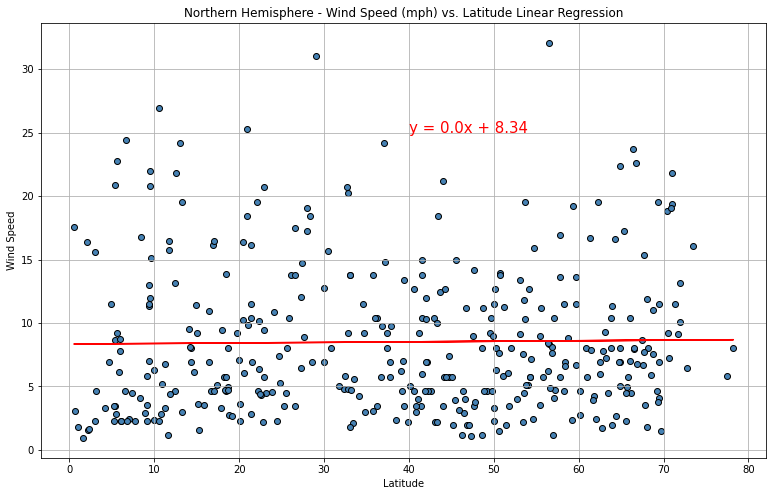

In [134]:
x_axis = northern_hemishphere["Lat"]
y_axis = northern_hemishphere["Wind Speed"]
weather_graphing(x_axis, y_axis, 'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression', 'Latitude', 'Wind Speed', (40,25))
plt.savefig('../Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

##### The linear regression is graphing the relationship between the wind speed of cities and their latitude in the northern hemisphere. The relationship between Wind Speed and Latitude is positive, but weak, meaning there is no significance change to a cities cloudiness percentage and its location north of the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.107


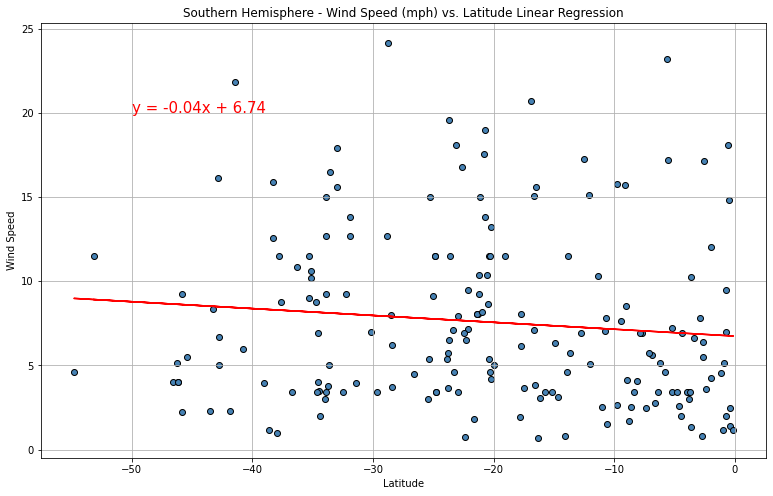

In [135]:
x_axis = southern_hemishphere["Lat"]
y_axis = southern_hemishphere["Wind Speed"]
weather_graphing(x_axis, y_axis, 'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression', 'Latitude', 'Wind Speed', (-50,20))
plt.savefig('../Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

##### The linear regression is graphing the relationship between the wind speed of cities and their latitude in the southern hemisphere. The relationship between Wind Speed and Latitude is negative, but weak, meaning there is no significance change to a cities cloudiness percentage and its location south of the equator.